In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import random 
import seaborn as sns
from math import log2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# calling helper funtions
import data_prepare as dp
import data_viz as dviz
import data_split as ds
import prediction as pred

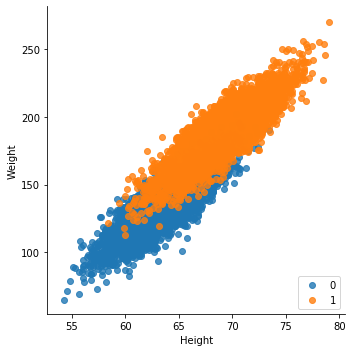

In [2]:
# more than two features 
#df = pd.read_csv("data/104f2liris.csv")
#df = pd.read_csv("data/024f2liris.csv")
#df = pd.read_csv("data/124f2liris.csv")

# more than two classes

# perfect two class two features

#df = pd.read_csv("data/circle.csv")
#df = pd.read_csv("data/3rd.csv")
df = pd.read_csv("data/weight-height.csv")
#df = pd.read_csv("data/triangle.csv")
dviz.DDScatterDFSns(0, 1, df)

In [3]:
X = np.array(df[df.columns[:-1]].values.tolist(), dtype=np.float64)
label = np.array(df[df.columns[-1]].values.tolist())
index = 0
to_split = [[X, label, index]]
t_split = to_split
tree_depth = 4
epochs = 1000
min_pts = 3
# childs can be 2^tree_depth len of columns + 3 (bias, left and right)
tree = np.zeros((2**tree_depth, len(X[0])+3))
next_free = 0


C:\Users\subash\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\subash\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
C:\Users\subash\Anaconda3\envs\thesis\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`

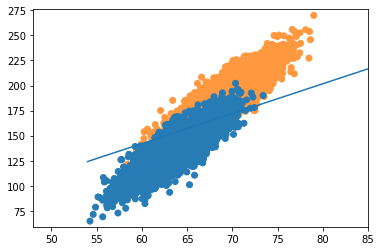

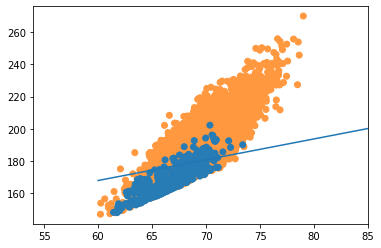

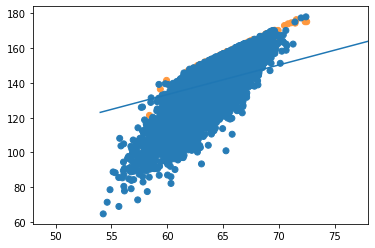

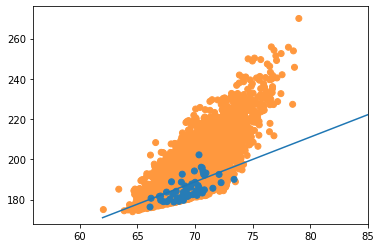

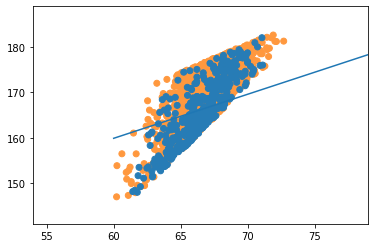

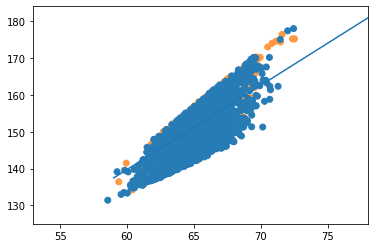

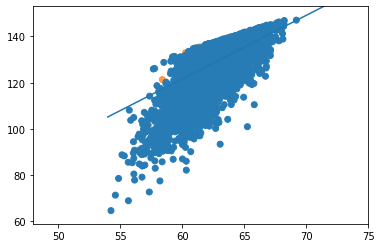

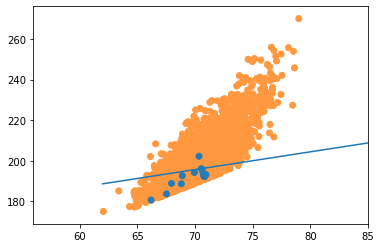

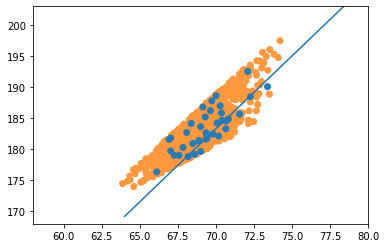

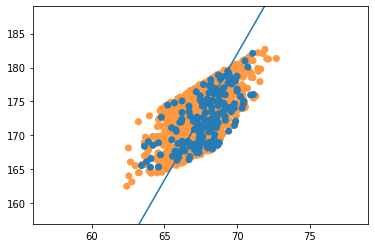

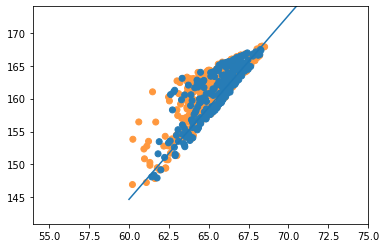

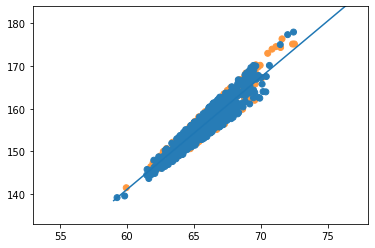

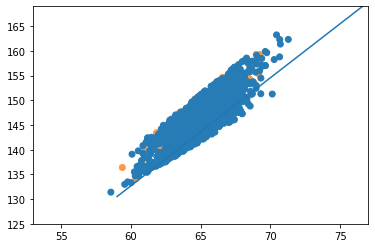

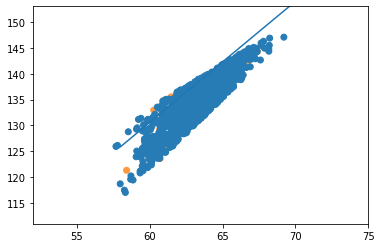

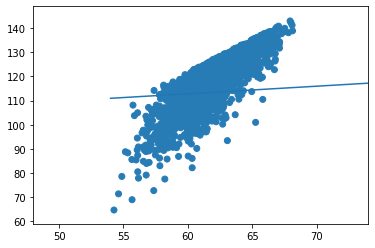

In [4]:
#to_split = df

for depth in range(tree_depth):
    tmp_split = []
    
    # shfuffling for each node
    #to_split = shuffle(to_split)
    # for each left and right node
    for i in range(len(to_split)):        
        # checking if pos and neg data to separate
        if len(to_split[i]) == 0:
            print("No further point to separate")
            continue
        
        # 0 index for feature 1 for label, 2 for index position
        X2 = to_split[i][0]
        label2 = to_split[i][1]
        
        #X2, label2, pos, neg = dp.data_giver(to_split)
        pos, neg = dp.pos_neg_giver(to_split[i])        
        
        # best_gain; highest the information gain will be good
        best_gain = 0
        # best_theta = coefficient or line
        best_theta = []
        # best_pos_side, best_neg_side = data points for pos and negative after the best_gain split
        best_pos_side = []
        best_neg_side = []

        for epoch in range(epochs):
            # find random feature points as linear combination
            p = random.choice(pos)
            n = random.choice(neg)

            # getting parameters from split
            gain, pos_side, neg_side, theta = ds.split_data(X2, label2, pos, neg, p, n)
            #print(gain)

            # checking for best gain and setting rest parameters of it
            if gain > best_gain:
                best_gain = gain
                best_pos_side = pos_side
                best_neg_side = neg_side
                best_theta = theta

                #dviz.viz_data_with_line(best_theta, to_split[i])                

        # building tree
        if depth != tree_depth:
            # check left node's purity
            pos_idx = np.where(label2[[best_pos_side]] == 1)
            neg_idx = np.where(label2[[best_pos_side]] == 0)

            if len(pos_idx) == 0 or len(neg_idx) == 0:
                print("pure node found in left\n")
            else:
                if len(pos_idx[0]) > min_pts and len(neg_idx[0]) > min_pts:

                    # making sub dataframe for left
                    left_x = X2[best_pos_side]
                    left_label = label2[best_pos_side]
                    next_free += 1

                    tree[to_split[i][2]][3] = next_free                
                    #for circle and triangle
                    #tmp_split = [tmp_split, [left_x, left_label, next_free]]                                        
                    tmp_split.append([left_x, left_label, next_free])
            
            # check right node's purity
            pos_idx = np.where(label2[[best_neg_side]] == 1)
            neg_idx = np.where(label2[[best_neg_side]] == 0)

            if len(pos_idx) == 0 or len(neg_idx) == 0:
                print("pure node found in right\n")
            else:
                if len(pos_idx[0]) > min_pts and len(neg_idx[0]) > min_pts:

                    # making sub dataframe for left
                    right_x = X2[best_neg_side]
                    right_label = label2[best_neg_side]                    
                    next_free += 1
                      
                    tree[to_split[i][2]][4] = next_free      
                    #for circle and triangle
                    #tmp_split = [tmp_split, [right_x, right_label, next_free]]                                        
                    tmp_split.append([right_x, right_label, next_free])            
            
            # for storing weights and +1 for bias
            tree[to_split[i][2]][:len(X[0])+1] = best_theta.T

        # ploting graph
        # for individual split
        #dviz.viz_data_with_line(best_theta, to_split[i])
        
        # for multiple split at once
        dviz.viz_data_with_line_np(best_theta, to_split[i])
    to_split = tmp_split        

In [9]:
tree

array([[  -0.94821864,    0.31761834,   11.77252521,    1.        ,
           2.        ],
       [  -0.79072158,    0.61217595,  -55.32719644,    3.        ,
           4.        ],
       [  -0.86231001,    0.50638073,  -15.75158782,    5.        ,
           6.        ],
       [  -0.91220366,    0.40973709,  -13.52409128,    7.        ,
           8.        ],
       [  -0.696962  ,    0.71710806,  -72.82919916,    9.        ,
          10.        ],
       [  -0.91625651,    0.40059207,   -1.00424576,   11.        ,
          12.        ],
       [  -0.9396034 ,    0.34226518,   14.74221698,   13.        ,
          14.        ],
       [  -0.65866585,    0.75243558, -101.12084617,    0.        ,
          15.        ],
       [  -0.92001105,    0.39189243,   -7.42912013,   16.        ,
           0.        ],
       [  -0.96565387,    0.25983186,   20.30608634,   18.        ,
           0.        ],
       [  -0.9413874 ,    0.33732738,    7.66858864,   20.        ,
           0

In [10]:
# undefine node back to 0 index
for i in range(len(tree)):
    lid = int(tree[i][-1])
    rid = int(tree[i][-2])
    
    if len(tree) <= lid:
        tree[i][-1] = 0
    elif len(tree) <= rid:
        tree[i][-2] = 0
        
print("exits")

exits


In [11]:
tree

array([[  -0.94821864,    0.31761834,   11.77252521,    1.        ,
           2.        ],
       [  -0.79072158,    0.61217595,  -55.32719644,    3.        ,
           4.        ],
       [  -0.86231001,    0.50638073,  -15.75158782,    5.        ,
           6.        ],
       [  -0.91220366,    0.40973709,  -13.52409128,    7.        ,
           8.        ],
       [  -0.696962  ,    0.71710806,  -72.82919916,    9.        ,
          10.        ],
       [  -0.91625651,    0.40059207,   -1.00424576,   11.        ,
          12.        ],
       [  -0.9396034 ,    0.34226518,   14.74221698,   13.        ,
          14.        ],
       [  -0.65866585,    0.75243558, -101.12084617,    0.        ,
          15.        ],
       [  -0.92001105,    0.39189243,   -7.42912013,    0.        ,
           0.        ],
       [  -0.96565387,    0.25983186,   20.30608634,    0.        ,
           0.        ],
       [  -0.9413874 ,    0.33732738,    7.66858864,    0.        ,
           0

In [12]:
# on training 
print(pred.predict(tree, X[7]))

y_pred = pred.predict(tree, X)
print(classification_report(label, y_pred, labels=[0, 1]))
print(accuracy_score(label, y_pred))
print(confusion_matrix(label, y_pred))

"""Result on weight_hieght data set very bad so try to combine lr and generate tree here"""

0
              precision    recall  f1-score   support

           0       0.75      0.46      0.57      5000
           1       0.61      0.84      0.71      5000

    accuracy                           0.65     10000
   macro avg       0.68      0.65      0.64     10000
weighted avg       0.68      0.65      0.64     10000

0.6543
[[2324 2676]
 [ 781 4219]]


'Result on weight_hieght data set very bad so try to combine lr and generate tree here'

In [78]:
#dviz.scatter_plot(to_split)

In [15]:
multiple feature look working lets see how to it works with other binary larger dataset 


array([6.4, 3.2, 4.5, 1.5])

In [ ]:
how to prepare for tree structure 
if l1 >= something or if l1:
    left: pure set of 0 label
    right: if l2 or l2 >= something
        left: l3
            left: 0
            right: 1
        right:
            left: l4
                left/right:0
            right: 0
                

this can be done by analyzing each line creation; use visuals
then prepare for tree before computing or find way to build from tree object
